In [730]:
#This is a fairly simnple and quick EDA that is centred around answering the following queries:
# 1. What are the rent prices for apartments in Kenya?
 

In [731]:
#import modules
import pandas as pd
import numpy as np6
import seaborn as sns
import matplotlib.pyplot as plt

In [732]:
#read the csv file
df = pd.read_csv(r"D:\JUDE PROGRAMMING\PORTFOLIO PROJECTS\APARTMENT PRICES IN KENYA EDA\apartments.csv")
df.head()


,Unnamed: 0,title,location,bedrooms,bathrooms,price,rate
0,0,3 Bedroom Apartment / Flat to rent in Riverside,"Riverside Dr Nairobi, Riverside, Nairobi",3,3,200 000,Per Month
1,1,3 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",3,4,70 000,Per Month
2,2,3 Bedroom Apartment / Flat to rent in Nyali,"Links Rd Mombasa, Nyali, Mombasa",3,2,38 000,Per Month
3,3,3 Bedroom Apartment / Flat to rent in Lavington,"Near Valley Arcade, Lavington, Nairobi",3,3,80 000,Per Month
4,4,1 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",1,1,110 000,Per Month


In [733]:
df[['0','1']] = df['title'].str.split('Bedroom Apartment / Flat to rent in ',expand=True)
df.head()

,Unnamed: 0,title,location,bedrooms,bathrooms,price,rate,0,1
0,0,3 Bedroom Apartment / Flat to rent in Riverside,"Riverside Dr Nairobi, Riverside, Nairobi",3,3,200 000,Per Month,3,Riverside
1,1,3 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",3,4,70 000,Per Month,3,Kileleshwa
2,2,3 Bedroom Apartment / Flat to rent in Nyali,"Links Rd Mombasa, Nyali, Mombasa",3,2,38 000,Per Month,3,Nyali
3,3,3 Bedroom Apartment / Flat to rent in Lavington,"Near Valley Arcade, Lavington, Nairobi",3,3,80 000,Per Month,3,Lavington
4,4,1 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",1,1,110 000,Per Month,1,Kileleshwa


In [734]:
df = df.drop(columns = {'title','location','bathrooms','rate','Unnamed: 0','0'})

In [735]:
df.head()

,bedrooms,price,1
0,3,200 000,Riverside
1,3,70 000,Kileleshwa
2,3,38 000,Nyali
3,3,80 000,Lavington
4,1,110 000,Kileleshwa


In [736]:
df = df.rename(columns = {'bedrooms' : 'Bedrooms','price':'Rent','1':'Location'})

In [737]:
df.dtypes

Bedrooms     int64
Rent        object
Location    object
dtype: object

In [738]:
df['Rent'].astype:int = df['Rent']
df.dtypes


Bedrooms     int64
Rent        object
Location    object
dtype: object

In [739]:
df2 =df.copy()
df2.dtypes

Bedrooms     int64
Rent        object
Location    object
dtype: object

In [740]:
df['Rent'].str.replace(' ','').astype(int)

0       200000
1        70000
2        38000
3        80000
4       110000
         ...  
2515     75000
2516     45000
2517     65000
2518    300000
2519    100000
Name: Rent, Length: 2520, dtype: int32

In [741]:
df['Rent'].str.replace(' ','').astype(int)

0       200000
1        70000
2        38000
3        80000
4       110000
         ...  
2515     75000
2516     45000
2517     65000
2518    300000
2519    100000
Name: Rent, Length: 2520, dtype: int32

In [742]:
df

,Bedrooms,Rent,Location
0,3,200 000,Riverside
1,3,70 000,Kileleshwa
2,3,38 000,Nyali
3,3,80 000,Lavington
4,1,110 000,Kileleshwa
...,...,...,...
2515,3,75 000,Kilimani
2516,3,45 000,Nyali
2517,2,65 000,Spring Valley
2518,4,300 000,Muthaiga


In [743]:
df['Rent']= df['Rent'].str.replace(' ','').astype(int)

In [744]:
df.dtypes

Bedrooms     int64
Rent         int32
Location    object
dtype: object

In [745]:
df['Bedrooms'].astype(int)

0       3
1       3
2       3
3       3
4       1
       ..
2515    3
2516    3
2517    2
2518    4
2519    2
Name: Bedrooms, Length: 2520, dtype: int32

In [746]:
df['Rent'] = df['Rent'].astype(int)
df['Bedrooms'] = df['Bedrooms'].astype(int)
df.dtypes

Bedrooms     int32
Rent         int32
Location    object
dtype: object

In [747]:
df.dtypes

Bedrooms     int32
Rent         int32
Location    object
dtype: object

In [748]:
y = df['Rent']
x = df['Location']

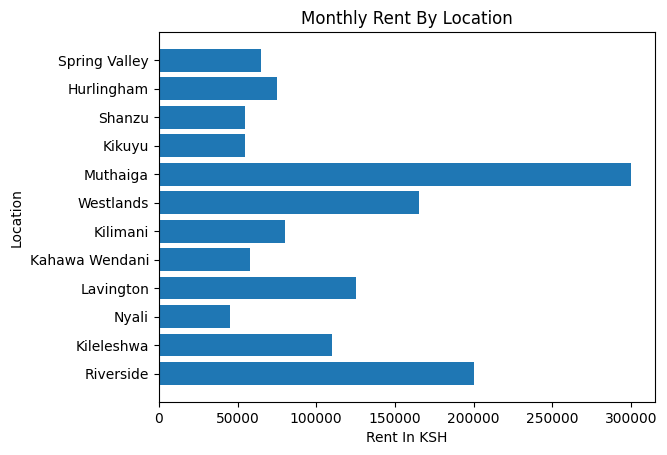

In [749]:
plt.title('Monthly Rent By Location')
plt.xlabel('Rent In KSH')
plt.ylabel('Location')
plt.barh(x,y)
plt.show()


<Axes: title={'center': 'Apartment Distribution Based On Number Of Bedrooms'}, ylabel='count'>

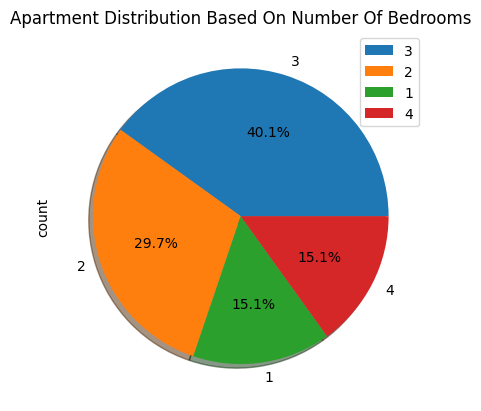

In [750]:
#What is the distribution of apartments based on the number of  bedrooms?(Use Percentages)


df['Bedrooms'].value_counts().plot(kind = 'pie',legend = True,shadow = True,autopct = '%.1f%%',title = "Apartment Distribution Based On Number Of Bedrooms")

In [751]:
#What is the correlation between number of bedrooms and rent?
df[['Rent','Bedrooms']].corr()

,Rent,Bedrooms
Rent,1.000000,0.468572
Bedrooms,0.468572,1.000000


<Axes: title={'center': 'Correlation Between Rent and Location'}, xlabel='Rent', ylabel='Location'>

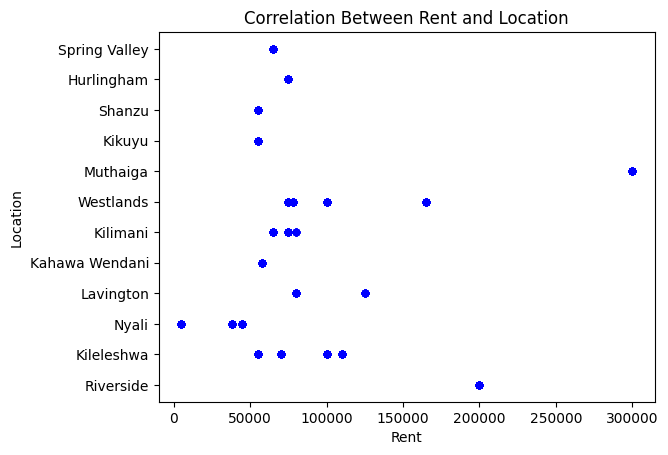

In [752]:
#create a scatter plot to check if there is any correlation between Rent and Location
df.plot(x="Rent", y="Location", kind="scatter",title = 'Correlation Between Rent and Location',color = 'blue')

In [753]:
#Most expensive in Kileleshwa
kile = df.loc[df['Location'] == 'Kileleshwa']
kile.sort_values(by = 'Rent',ascending = False)

# Most expensive apartments in Kileleshwa = Ksh.110000

,Bedrooms,Rent,Location
1264,1,110000,Kileleshwa
655,1,110000,Kileleshwa
613,1,110000,Kileleshwa
1916,1,110000,Kileleshwa
1159,1,110000,Kileleshwa
...,...,...,...
792,2,55000,Kileleshwa
1800,2,55000,Kileleshwa
772,2,55000,Kileleshwa
768,2,55000,Kileleshwa


In [754]:
df['Rent'].describe().max()

#Most expensive apartment overrall is Ksh.300000

300000.0

In [755]:
nyali = df.loc[df['Location'].isin(['Nyali'])].max()
nyali

#Most expensive apartments in Nyali has 3 Bedrooms and goes for Ksh.45000.

Bedrooms        3
Rent        45000
Location    Nyali
dtype: object

In [756]:
nyali.count()

#There are 3 such apartments

3